# Boston Housing Prediction
- Author: Rishu Shrivastava, Babu Sivaprakasam
- Link: https://www.kaggle.com/c/boston-housing
- Last Update: 02 Apr 2018

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

### Loading the boston dataset - Train and Test

In [2]:
data_path = "C:/Users/Rishu/Desktop/dATA/boston/"

boston_data=pd.read_csv(data_path+'train.csv')

boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [3]:
boston_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
boston_data_test=pd.read_csv(data_path+'test.csv')

boston_data_test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


### Understanding the distribution and relationship of the data


- Describing the data to understand the mean and std for all of the features

In [5]:
boston_data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


- Plotting the target price value: "medv"

C:\Users\Rishu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


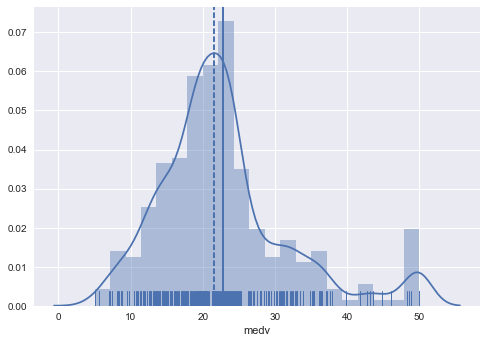

Mean Price value : 22.768768768768783


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


sns.distplot(boston_data['medv'], rug=True, color="b")
plt.axvline(boston_data['medv'].mean(), color="b", linestyle='solid', linewidth=2)
plt.axvline(boston_data['medv'].median(), color="b", linestyle='dashed', linewidth=2)

plt.show()

print ("Mean Price value :",boston_data['medv'].mean())

From the above plot we can understand that the price of the houses ranges in an average price range of: 22.76 (in $1000).
So any ML algorithm with a bad accuracy will end up predicting the mean value.

- Understanding the features and its relation with the price of the boston houses "medv"

From the data set, let us consider the following features (only the prime contenders out of 15 features):
1. **crim** *(per capita crime rate by town)*: 
    An area with higher crime rate is expected to have lesser price than with a well established areas.
2. **indus** *(proportion of non-retail business acres per town)*: 
    Non retail business can be an important factor in the prices of house as it provides convienence to the house owners and people. But acres of non-retail business land doesn't give much insight into the prices of the house. Hence we can give this feature low priority, subject to correlation with medv data.
3. **nox** *(nitrogen oxides concentration)*: 
    Nitrogen oxide can be a major factor in the housing prices as the preferences of buying a house with lower pollution would be higher.
4. **rm** *(average number of rooms per dwelling)*:
    Higher the number of rooms, higher the price.
5. **dis** *(weighted mean of distances to five Boston employment centres)*:
    Closer the distance to offices, expected to have more interest in the areas as it reduces commute. Not sure about the American way, but closer to offices, higher the house prices.
6. **ptratio** *(pupil-teacher ratio by town)*:
    Though i am not 100% sure about the relation between pupil and teacher. I am assuming more the number of pupil to teacher ratio, people are expected to send kids there, in turn making the prices higher. We can give this feature low priority as it may not be closely related to house pricing, subject to correlation with medv data.
7. **black** *(the proportion of blacks by town)*:
    Subject to correlation with the target data
8. **lstat** *(lower status of the population)* : 
    People who are earning lower wages are not expected to live in a high priced houses. Hence lower the lstat higher the housing prices.

- Finding correlation with target and the selected features

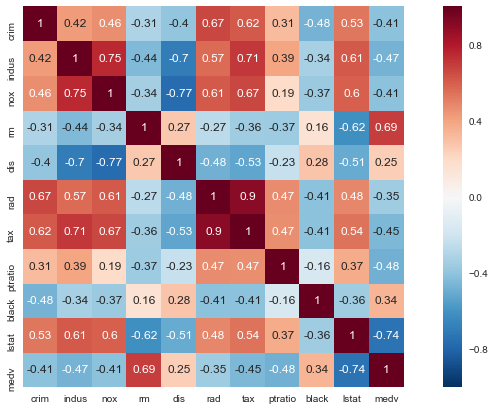

In [7]:
ax = plt.subplots(figsize = (14,7))
sns.heatmap(boston_data[['crim','indus','nox','rm','dis','rad','tax','ptratio','black','lstat','medv']].corr(),
            linecolor = 'white', square=True, annot=True)
plt.show()

C:\Users\Rishu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


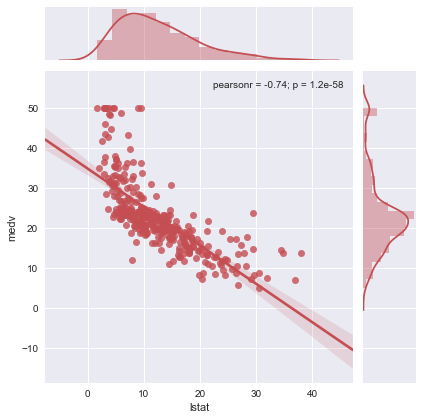

In [8]:
sns.jointplot(x='lstat', y='medv', data=boston_data, color="r", kind="reg")
plt.show()

- ### Most co-related features

Based on the above co-relation chart, we would like to take into consider the features which are more closely related to the target value. The features in consideration are:
1. **indus**
2. **rm**      : Highest positive correlation with medv (coeff: 0.69)
3. **ptratio**
4. **lstat**   : Highly negative correlated feature with coefficient of -0.74

Now let us visualize the distribution of the 4 selected features in a pairplot


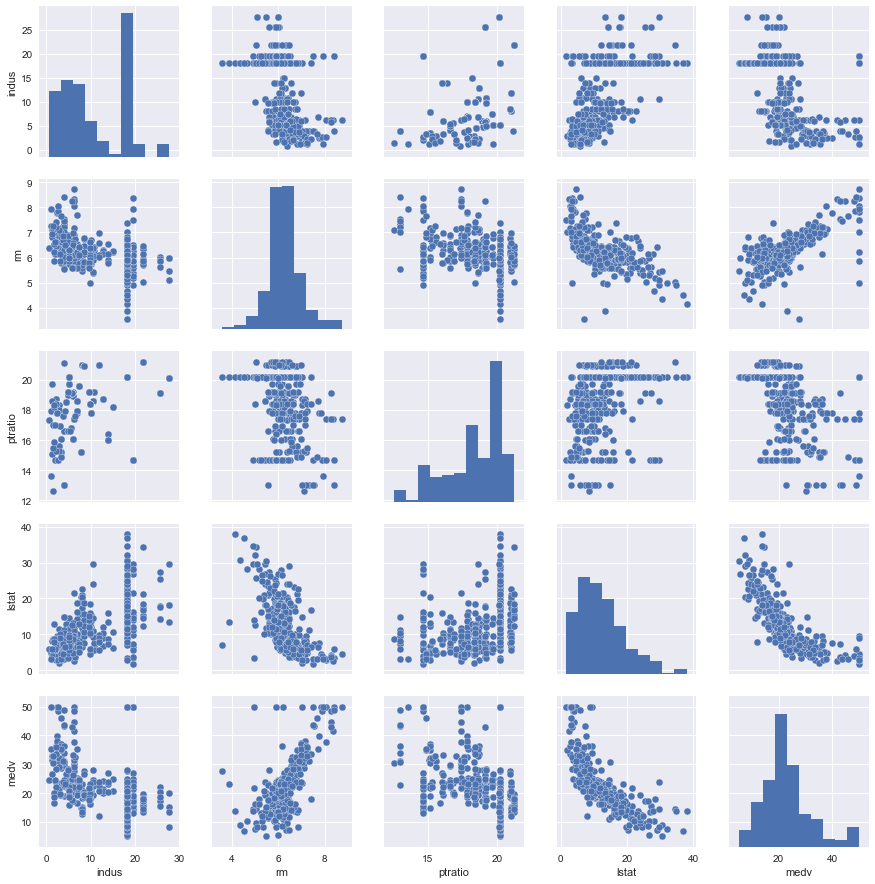

In [9]:
# Pair plot of the features
sns.pairplot(boston_data[['indus','rm','ptratio','lstat','medv']])
plt.show()

### Building the data with the selected features

In [10]:
X = boston_data[['indus','rm','ptratio','lstat']]
X_bd_test=boston_data_test[['indus','rm','ptratio','lstat']]

In [11]:
y = boston_data[['medv']]

- Splitting the train data for train and cross-validation datasets

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, random_state=0)

print(len(X_train), len(y_train), len(X_cv), len(y_cv))

249 249 84 84


### Model Fitting

- Using DecisionTreeRegressor for finding the maximum score

In [31]:
from sklearn.tree import DecisionTreeRegressor

max_score = 0
max_depth = 0

def decision_tree(j):
    dtr = DecisionTreeRegressor(random_state=0,max_depth=j)
    return dtr.fit(X_train, y_train)
    

for i in range(1,11):
    _dtr = decision_tree(i)
    clf_score = _dtr.score(X_cv,y_cv)
    print("Decision Tree Regressor at max_depth:",i," scored: ",clf_score)
    if clf_score>max_score:
        max_score = clf_score
        max_depth = i
        

Decision Tree Regressor at max_depth: 1  scored:  0.459730776541
Decision Tree Regressor at max_depth: 2  scored:  0.725856285508
Decision Tree Regressor at max_depth: 3  scored:  0.776509251005
Decision Tree Regressor at max_depth: 4  scored:  0.795714827114
Decision Tree Regressor at max_depth: 5  scored:  0.783052613569
Decision Tree Regressor at max_depth: 6  scored:  0.784298503142
Decision Tree Regressor at max_depth: 7  scored:  0.800693113663
Decision Tree Regressor at max_depth: 8  scored:  0.826128192994
Decision Tree Regressor at max_depth: 9  scored:  0.822883620308
Decision Tree Regressor at max_depth: 10  scored:  0.715388098288


- Selecting the max depth

In [23]:
print("The maximum score is achieved at a depth of : ",max_depth," with score of :",max_score)

The maximum score is achieved at a depth of :  8  with score of : 0.826128192994


- Training the model with max_depth

In [32]:
dtr_clf = decision_tree(max_depth)

- Finding the importance of feature in the regression algorithm

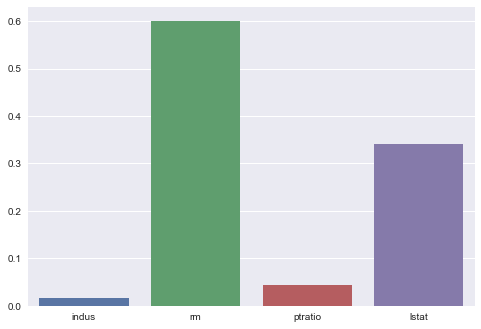

In [33]:
sns.barplot(X_train.columns, dtr_clf.feature_importances_)
plt.show()

We can conclude that **rm** and **lstat** are two of them most important factor in the prices of the house in boston area.

- Visualizing the dataset

In [63]:
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
import pydot
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(dtr_clf, out_file=dot_data,
    feature_names=X_train.columns,
    class_names="medv",
    filled=True, rounded=True,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_pdf("boston_dtr.pdf")

### Create Final Submission (Kaggle only)

- Plotting the prediction against the TEST data

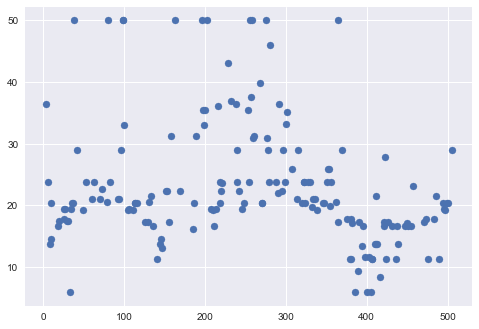

In [56]:
bd_predict = dtr_clf.predict(X_bd_test)

plt.scatter(boston_data_test['ID'],bd_predict)
plt.show()

In [55]:
print ("Mean Price value before modelling:",boston_data['medv'].mean())
print ("Mean Price value after modelling :",bd_predict.mean())

Mean Price value before modelling: 22.768768768768783
Mean Price value after modelling : 23.0697137306


- Generate the test dataframe as csv output

In [62]:
submission = pd.DataFrame({
              "ID": boston_data_test['ID'],
              "medv": bd_predict
        })
submission.to_csv(data_path+'output.csv', index=False)